In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
df = pd.read_csv("patients.csv")
#print(df.head())
dfJune = df.loc[df['PositiveDate'] >= "2020/05/31"][df['PositiveDate'] <= "2020/07/16"]
Npatients = pd.pivot_table(dfJune,values="id",aggfunc="count",index="PositiveDate")

No handles with labels found to put in legend.
(array([9.44915697, 0.37498758, 3.12102028]), 1)


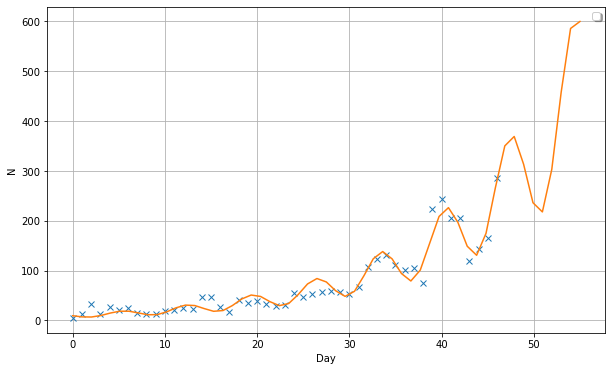

In [7]:
import math
import numpy as np
from scipy import optimize

xdata = np.linspace(0,len(Npatients)-1,num=len(Npatients))
ydata = Npatients['id'].tolist()


def fit_func(parameter,x,y):
    a = parameter[0]
    b = parameter[1]
    c = parameter[2]
    p = a * (2 ** (x/9.8))*(1+b*np.sin(c+2*np.pi*x/7))
    residual = y - p
    return residual

parameter0 = [0.,0.,3.]
result = optimize.leastsq(fit_func,parameter0,args=(xdata,ydata))
print(result)
#PLot
a_fit=result[0][0]
b_fit=result[0][1]
c_fit=result[0][2]
def f(x):
    return a_fit * ( 2 ** (x/9.8))*(1+b_fit*np.sin(c_fit + 2*np.pi*x/7))




plt.figure(figsize=(10,6))
plt.plot(xdata,ydata,marker="x",linestyle='None')

#for debug
M = max(55,len(Npatients))
xdata = np.linspace(0,M,num=M)
##
plt.plot(xdata,f(xdata))
plt.xlabel('Day')
plt.ylabel('N')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
